In [1]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('Housing.csv')


In [4]:
print(df.head())
print(df.info())
print(df.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [7]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})


In [8]:
print(df.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


In [9]:
X = df.drop(['price'], axis=1)
y = df['price']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)


In [13]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.0352
Root Mean Squared Error (RMSE): 1331071.4167895108
R2 Score: 0.6494754192267803


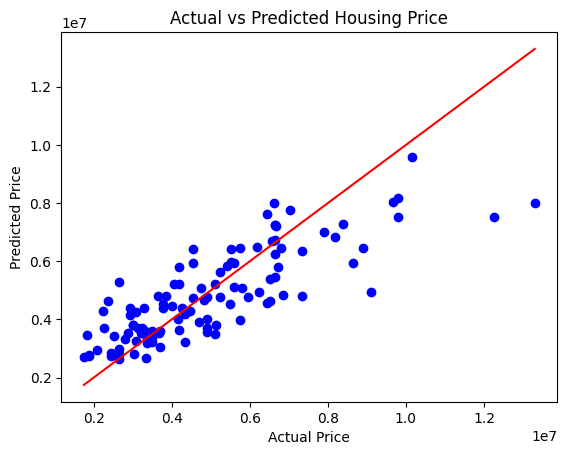

In [14]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Price')
plt.show()


In [15]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print("Intercept:", model.intercept_)


             Feature   Coefficient
0               area  2.358488e+02
1           bedrooms  7.857449e+04
2          bathrooms  1.097117e+06
3            stories  4.062232e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
6           basement  3.931598e+05
7    hotwaterheating  6.878813e+05
8    airconditioning  7.855506e+05
9            parking  2.257565e+05
10          prefarea  6.299017e+05
11  furnishingstatus  2.103971e+05
Intercept: -127711.16739244293
